### Project: Computational models for robot-induced hallucinations in Parkinson’s Disease
### Laboratory of Cognitive Neuroscience - LNCO
### Author: Duarte Rodrigues
##### Script: This code allows to visualize the predictions after the data cleaning process used to compute the features. A new video is created with the DLC artifacts solved. This should be done in videos that have a good tracking accuracy and precision.

In [1]:
'''Main libraries import'''
import motionAnalysisFX
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
from IPython.display import display
from moviepy.editor import *
import deeplabcut
import os

In [2]:
''' Select an original video, in downsampled quality, but no predictions. 
This video will be the canvas to apply the new cleaned/smoothed predictions.

NOTE: When you run this cell, a new window opens to select the database folder with all the results. The new window
usually opens behind the code editor software.'''

from tkinter import Tk  
from tkinter.filedialog import askopenfilename
import cv2

Tk().withdraw()
video_path = askopenfilename(title='Choose original video', initialdir=r'D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\clean_predictions') # show an "Open" dialog box and return the path to the selected file

cap=cv2.VideoCapture(video_path)
fs = cap.get(cv2.CAP_PROP_FPS)
original_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_standardized.h5


In [3]:
''' In the cleaning process to compute the features, the initial and last 7 seconds are erased. 
Therefore, the video needs to be trimmed.'''

#trimming the original video - taking 7 seconds from the beginning and end
clip = VideoFileClip(video_path)
clip1 = clip.subclip(7,(original_frame_count-int(7*fs))/fs)
trim_path=video_path[:-4]+'_trimmed.mp4'
clip1.set_fps(fs).write_videofile(trim_path)
clip.close()
clip1.close()

# counting the frames of the new video
cap=cv2.VideoCapture(trim_path)
new_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(new_frame_count)
cap.release()

Moviepy - Building video D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_DownCrop_trimmed.mp4.
Moviepy - Writing video D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_DownCrop_trimmed.mp4



Moviepy - Done !
Moviepy - video ready D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_DownCrop_trimmed.mp4
6919


In [4]:
'''IN CASE! The chosen video was not previously analyzed, run this cell to compute the DLC pose estimation predictions'''

#Path of the Config file of the model you want to analyze the video with
config_path = r"D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\config.yaml"

#Path of the output folder for the analysis
destiny=r'D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\clean_predictions\pres'
scorername = deeplabcut.analyze_videos(config_path,[trim_path], videotype='.mp4', batchsize=1, destfolder = destiny)
deeplabcut.create_video_with_all_detections(config_path,[trim_path], videotype='.mp4', destfolder = destiny)

  warnings.warn('`layer.apply` is deprecated and '

  outputs = layer.apply(inputs, training=is_training)



Using snapshot-450000 for model D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\dlc-models\iteration-0\ma_new_DB_SingleView_DownCropJul16-trainset95shuffle1
Activating extracting of PAFs
Starting to analyze %  D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_DownCrop_trimmed.mp4
Loading  D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_DownCrop_trimmed.mp4
Duration of video [s]:  115.32 , recorded with  60.0 fps!
Overall # of frames:  6919  found with (before cropping) frame dimensions:  512 288
Starting to extract posture from the video(s) with batchsize: 1


100%|██████████| 6919/6919 [04:32<00:00, 25.36it/s]


Video Analyzed. Saving results in D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\clean_predictions\pres...
Using snapshot-450000 for model D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\dlc-models\iteration-0\ma_new_DB_SingleView_DownCropJul16-trainset95shuffle1
Processing...  D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_DownCrop_trimmed.mp4
Analyzing D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\clean_predictions\pres\HC_7-28_R_async_right_angle_DownCrop_trimmedDLC_dlcrnetms5_ma_new_DB_SingleView_DownCropJul16shuffle1_450000.h5


6919it [00:01, 4427.48it/s]
6919it [00:00, 768263.60it/s]


The tracklets were created (i.e., under the hood deeplabcut.convert_detections2tracklets was run). Now you can 'refine_tracklets' in the GUI, or run 'deeplabcut.stitch_tracklets'.
Processing...  D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/clean_predictions/pres/HC_7-28_R_async_right_angle_DownCrop_trimmed.mp4


100%|██████████| 1/1 [00:00<?, ?it/s]


The videos are analyzed. Time to assemble animals and track 'em... 
 Call 'create_video_with_all_detections' to check multi-animal detection quality before tracking.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Creating labeled video for  HC_7-28_R_async_right_angle_DownCrop_trimmed


100%|██████████| 6919/6919 [00:20<00:00, 341.84it/s]


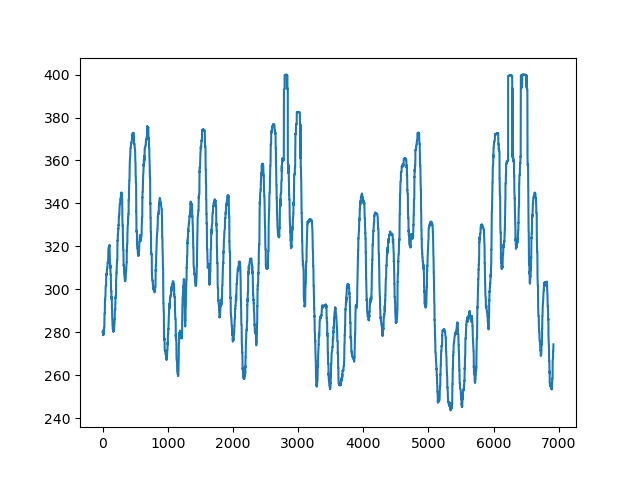

In [6]:
''' Here the predictions are loaded and plotted, to make sure the tracking was successful.
The curve should appear clean and sinusoidal, without much noise or spikes.'''

# IF! You ran the last cell then the h5 datafile should be saved in the destiny folder.

# IN CASE you already had the h5 data file from when you analyzed all the videos with DLC, then put the path here
h5=r"D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\clean_predictions\pres\HC_7-28_R_async_right_angle_DownCrop_trimmedDLC_dlcrnetms5_ma_new_DB_SingleView_DownCropJul16shuffle1_450000_el.h5"

# Loading the data to visualize it in a plot using the body part that is easier to evaluate if the tracking was precise - the finger
df, scorer, individuals, bodyparts = motionAnalysisFX.load_ma_datah5(h5, ma=True) # Read data
bodypart = 'finger1'
parameter = 'x'

%matplotlib widget
x_mov = df[scorer][individuals][bodypart][parameter]
time=motionAnalysisFX.time_list(x_mov,fs) 

motionAnalysisFX.plot(time,x_mov, data_label='Raw X-axis data', x_label='Time (seconds)', y_label= 'Distance to left border (cm)')
plt.title('Finger Movement Horizontal')

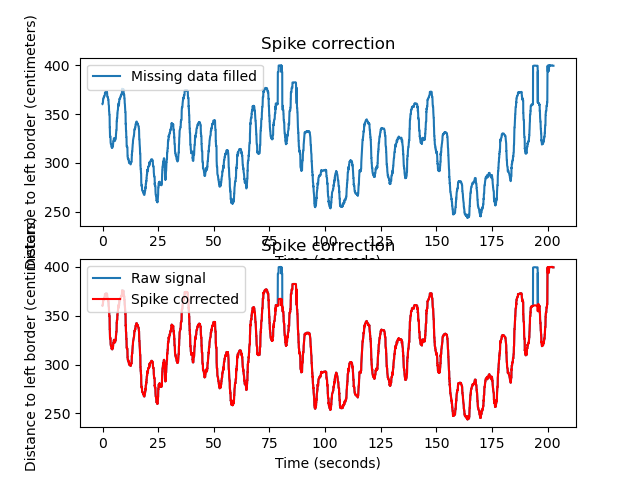

In [7]:
''' This function will take the raw body part position and clean the data, saving it in the filt_df. 
The data inputted here should be from the non-trimmed video (first run in DLC). 
If you use the data after trimming the video, a block of code needs to be commented.'''

def get_filt_df(st_df,fs,scorer,individuals,bodypart):
    
    # Trimming the signal (7 sec on the begining and end) to make sure the data analysed is all of interest
    
    # A way to optimize this is to have a participant by participant algortithm, where the first poke is identified 
    # and everything else before it is erased. Same reasoning for the last poke.

    total_dur = st_df.shape[0]/fs

    # Comment the next if block, if the data is from the trimmed video where the 14 seconds (begin+end) were already deleted
    if total_dur > 20: # this ensures there is enough time to crop out the extrimities 
        trim_samples = int(7*fs) # Arbitrary value (7 seconds) given by analyzing the database

        begin = range(trim_samples)
        end = range(st_df.shape[0]-trim_samples,st_df.shape[0])
        
        st_df = st_df.drop(end)
        st_df = st_df.drop(begin)
        st_df.reset_index(drop=True,inplace=True)

    # Movement in X axis

    # Cleaning Processing
    if motionAnalysisFX.all_nan(st_df[scorer][individuals][bodypart]['x']):
        print('This ' + bodypart + ' was not tracked! All feats NAN.')
        return st_df
    else:
        # Correct if the signal is missging (both if in the beginning or the middle)    
        st_df, x_mov_noisy = motionAnalysisFX.correct_NAN(st_df, scorer, bodypart, 'x', individual=individuals)

        # Algorithm to remove spikes
        x_mov = motionAnalysisFX.spike_removal(x_mov_noisy,plotting=True)

        # Applying a low pass filter to remove the jitter high frequency noise
        extra_cut = 1.5
        psd, freq = motionAnalysisFX.PSD(x_mov, fs,plotting=False) #getting the PSD allows to see what is the most prominent frequency
        iii = np.where(psd == max(psd[20:])) # only works in good siganls

        if len(iii[0])==0:
            cutoff = extra_cut
        else:
            cutoff = freq[int(iii[0])] + extra_cut #the cuttoff is a little more than the most important freq, since they can also be contributing to the optimal identification of the body part movement

            if cutoff < extra_cut-0.1:
                cutoff = extra_cut

        filt_mov_x = motionAnalysisFX.LowPassFilter(x_mov,fs,cutoff,5,application='') # Static filter order

        # Initializing the new filtered DF
        filt_df = st_df.copy()
        
        # Adding the clean data to the final dataframe
        for ind in range(st_df.shape[0]):
            filt_df.iloc[ind][scorer, individuals, bodypart, 'x'] = filt_mov_x[ind]

        # Movement in Y axis (exactly the same done in X)
        
        st_df, y_mov_noisy = motionAnalysisFX.correct_NAN(st_df, scorer, bodypart, 'y',individual=individuals)
        y_mov = motionAnalysisFX.spike_removal(y_mov_noisy)
        
        psd, freq = motionAnalysisFX.PSD(y_mov, fs,plotting=False)
        iii = np.where(psd == max(psd[20:])) # only works in good signals

        if len(iii[0])==0:
            cutoff = extra_cut
        else:
            cutoff = freq[int(iii[0])] + extra_cut # what is the frequency most prominent in the signal
        
            if cutoff < extra_cut-0.1:
                cutoff = extra_cut

        filt_mov_y = motionAnalysisFX.LowPassFilter(y_mov,fs,cutoff,5,application='') # Static filter order

        for ind in range(filt_df.shape[0]):
            filt_df.iloc[ind][scorer, individuals, bodypart, 'y'] = filt_mov_y[ind]
        
        # returns the initial df with the changes done in the specified body part
        return filt_df,filt_mov_x
%matplotlib widget
_, filt = get_filt_df(df,fs,scorer,individuals,'finger1')


In [ ]:
''' Visualization of the cleaned data'''
%matplotlib widget
ti=motionAnalysisFX.time_list(filt,fs)
motionAnalysisFX.plot(ti,filt, data_label='Clean x-axis data', x_label='Time (seconds)', y_label= 'Distance to left border (cm)')
plt.title('Finger Movement Horizontal')

plt.show()

In [12]:
'''Performing the clenaing data for all the body parts. Pay attention: This is for data of the original non_trimmed video. 
The data needs to be taken the 14 seconds.'''

display(df)
filt_df = df.copy()
for bp in bodyparts:
    print(bp)
    filt_df = get_filt_df(filt_df,fs,scorer,individuals,bp)
display(filt_df)

scorer      DLC_dlcrnetms5_ma_new_DB_SingleView_DownCropJul16shuffle1_450000  \
individuals                                                      participant   
bodyparts                                                            finger1   
coords                                                                     x   
0                                                      280.314                 
1                                                      280.387                 
2                                                      280.459                 
3                                                      280.490                 
4                                                      280.528                 
...                                                        ...                 
6914                                                   271.193                 
6915                                                   271.329                 
6916                                                   273.619                 
6917                                                   274.009                 
6918                                                   274.435                 

scorer                                                                 \
individuals                                                             
bodyparts                         wrist1                       elbow1   
coords             y likelihood        x        y likelihood        x   
0            108.350        1.0  216.283  150.753        1.0  133.341   
1            108.381        1.0  216.423  150.781        1.0  133.689   
2            107.886        1.0  216.728  150.664        1.0  133.770   
3            107.903        1.0  216.785  150.689        1.0  133.755   
4            107.916        1.0  216.774  150.701        1.0  133.755   
...              ...        ...      ...      ...        ...      ...   
6914          90.536        1.0  204.667  144.830        1.0  122.712   
6915          90.574        1.0  204.737  145.147        1.0  122.662   
6916          90.794        1.0  207.675  145.059        1.0  127.697   
6917          90.942        1.0  207.905  145.206        1.0  127.794   
6918          91.265        1.0  208.626  145.124        1.0  127.907   

scorer                                     ...                                 \
individuals                                ...                                  
bodyparts                       shoulder1  ... robot_joint robot_top            
coords             y likelihood         x  ...  likelihood         x        y   
0            200.835        1.0   125.509  ...         1.0   380.477  131.802   
1            200.884        1.0   125.511  ...         1.0   380.497  131.739   
2            200.845        1.0   125.491  ...         1.0   380.415  131.689   
3            200.827        1.0   125.506  ...         1.0   380.403  131.647   
4            200.837        1.0   125.499  ...         1.0   380.389  131.639   
...              ...        ...       ...  ...         ...       ...      ...   
6914         197.141        1.0   133.022  ...         1.0   384.292  133.565   
6915         197.035        1.0   133.121  ...         1.0   384.334  133.623   
6916         197.171        1.0   133.143  ...         1.0   384.621  133.476   
6917         197.029        1.0   133.216  ...         1.0   384.497  133.495   
6918         196.866        1.0   133.137  ...         1.0   384.555  133.485   

scorer                                                                     \
individuals                                                                 
bodyparts              robot_base                     robot_logo            
coords      likelihood          x        y likelihood          x        y   
0                  1.0    377.503  249.826        1.0    368.066  158.601   
1                  1.0    377.501  249.834        1.0    368.056  158.641   
2                  1.0   

elbow1
chin
finger2
wrist1
robot_top
robot_base
elbow2
This elbow2 was not tracked! All feats NAN.
robot_joint
shoulder2
shoulder1
wrist2
robot_logo
finger1


scorer      DLC_dlcrnetms5_ma_new_DB_SingleView_DownCropJul16shuffle1_450000  \
individuals                                                      participant   
bodyparts                                                            finger1   
coords                                                                     x   
0                                                   280.396723                 
1                                                   280.315703                 
2                                                   280.227845                 
3                                                   280.134583                 
4                                                   280.037782                 
...                                                        ...                 
6914                                                271.494089                 
6915                                                272.175976                 
6916                                                272.790779                 
6917                                                273.337091                 
6918                                                273.815024                 

scorer                                                                 \
individuals                                                             
bodyparts                               wrist1                          
coords                y likelihood           x           y likelihood   
0            108.609942        1.0  216.298244  150.922813        1.0   
1            108.399749        1.0  216.572101  150.698370        1.0   
2            108.185893        1.0  216.838887  150.470550        1.0   
3            107.966969        1.0  217.097467  150.239385        1.0   
4            107.741377        1.0  217.347114  150.004881        1.0   
...                 ...        ...         ...         ...        ...   
6914          90.864926        1.0  205.952107  144.721259        1.0   
6915          90.703873        1.0  206.502034  144.725512        1.0   
6916          90.574477        1.0  206.999603  144.736404        1.0   
6917          90.472652        1.0  207.443586  144.751774        1.0   
6918          90.394343        1.0  207.833829  144.769736        1.0   

scorer                                                      ...              \
individuals                                                 ...               
bodyparts        elbow1                          shoulder1  ... robot_joint   
coords                x           y likelihood           x  ...  likelihood   
0            133.331753  200.657266        1.0  125.513044  ...         1.0   
1            133.267900  200.461781        1.0  125.507485  ...         1.0   
2            133.199657  200.272311        1.0  125.501839  ...         1.0   
3            133.128315  200.090467        1.0  125.496103  ...         1.0   
4            133.055577  199.917836        1.0  125.490279  ...         1.0   
...                 ...         ...        ...         ...  ...         ...   
6914         124.077653  196.861906        1.0  133.058346  ...         1.0   
6915         124.698409  196.830808        1.0  133.076531  ...         1.0   
6916         125.269615  196.807644        1.0  133.093016  ...         1.0   
6917         125.787606  196.790607        1.0  133.107729  ...         1.0   
6918         126.249977  196.778185        1.0  133.120642  ...         1.0   

scorer                                                                  \
individuals                                                              
bodyparts     robot_top                         robot_base               
coords                x           y likelihood           x           y   
0            380.475628  131.793501        1.0  377.505365  249.821780   
1            380.478134  131.770409        1.0  377.509819  249.828914   
2            380.480555  131.747496        1.0  377.514065  249.836164   

In [ ]:
''' Now with the clean data, we need to do a trick to make the video with the predictions. 
DLC offers a filtering algorithm that does not work in our ri-PH case study. How it gives internal instructions that 
there has been created a filtered version of the data, that is saved in the destiny folder.

Our objective is to make the filtered verison, find it and substitute the data with the one we have been working on above.
Once this is done it will be much easier to build the video.'''

deeplabcut.filterpredictions(config_path,[trim_path],shuffle=1, filtertype='arima',ARdegree=5,MAdegree=2,destfolder = destiny)

print('=======================DLC finished printing the predictions =======================')
items = os.listdir(destiny)
for i in range(len(items)):
    if 'filtered.h5' in items[i]:
        save_path = os.path.join(destiny, items[i])

#In write mode it will substitute the initial one        
filt_df.to_hdf(save_path,key='df_with_missing', mode='w') # That key is necessary to be recognized by the function in the next cell
filt_df.to_csv(save_path[:-3]+'.csv')

In [14]:
''' This DLC function uses the (...)filtered.h5 data file to create the video with the predictions. 
With the code above we tricked it into using the data frame developped, as if was assuming the filtered data.'''
deeplabcut.create_labeled_video(config_path,[trim_path], save_frames=True, fastmode = True ,destfolder=destiny,filtered = True)

## If anything is going poorly be atentive to which data file you are calling, what initial video did you use, if you commented in the function the trimming step in case it is necessary.